In [ ]:
!pip install python-sat[pblib,aiger]

  0%|          | 0/3 [00:00<?, ?it/s]

4 2 4
[[0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]]


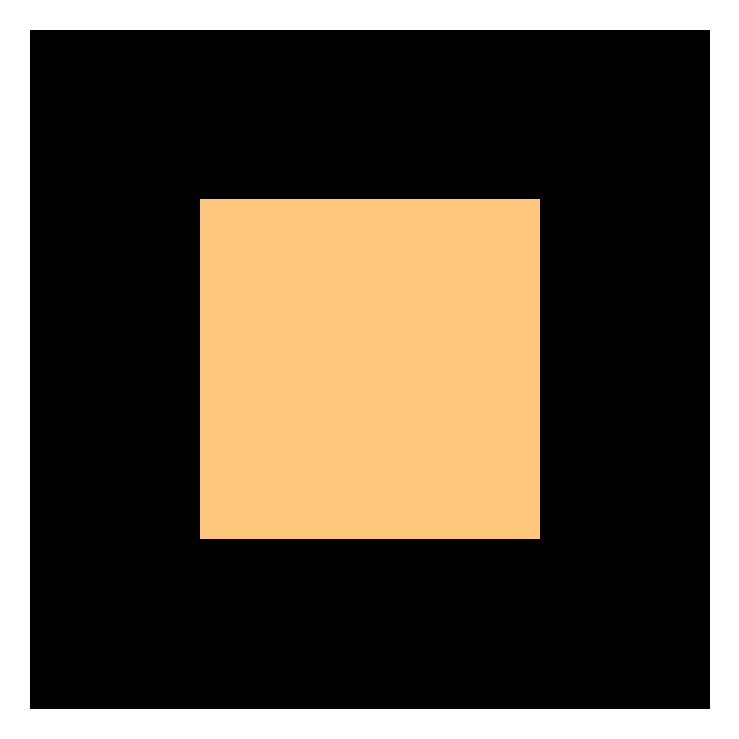

  0%|          | 0/7 [00:00<?, ?it/s]

8 3 6
[[0 0 0 0 0]
 [0 0 1 1 0]
 [0 1 0 1 0]
 [0 1 1 0 0]
 [0 0 0 0 0]]


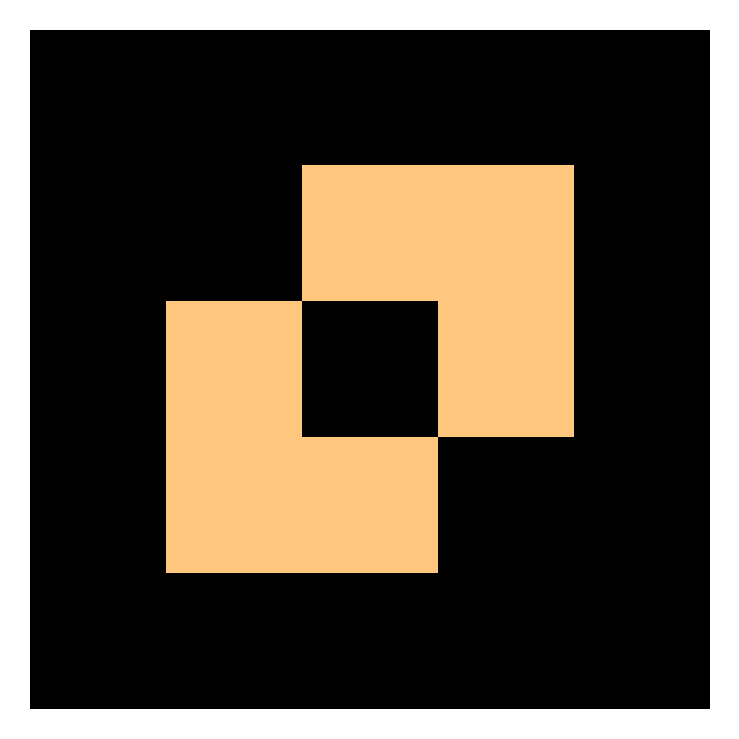

  0%|          | 0/11 [00:00<?, ?it/s]

12 4 12
[[0 0 0 0 0 0]
 [0 1 1 1 1 0]
 [0 1 0 0 1 0]
 [0 1 0 0 1 0]
 [0 1 1 1 1 0]
 [0 0 0 0 0 0]]


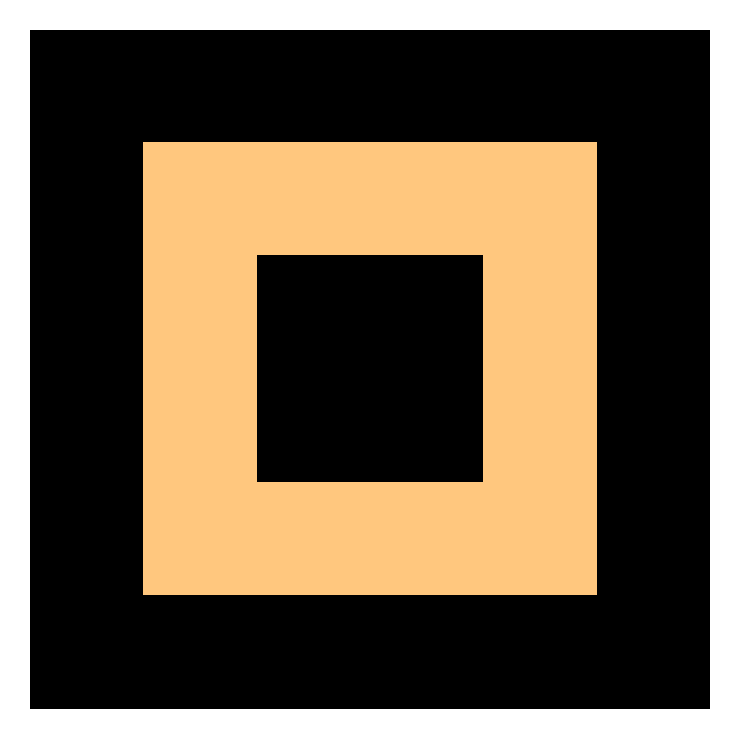

  0%|          | 0/17 [00:00<?, ?it/s]

18 5 17
[[0 0 0 0 0 0 0]
 [0 1 1 0 1 1 0]
 [0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0]
 [0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0]]


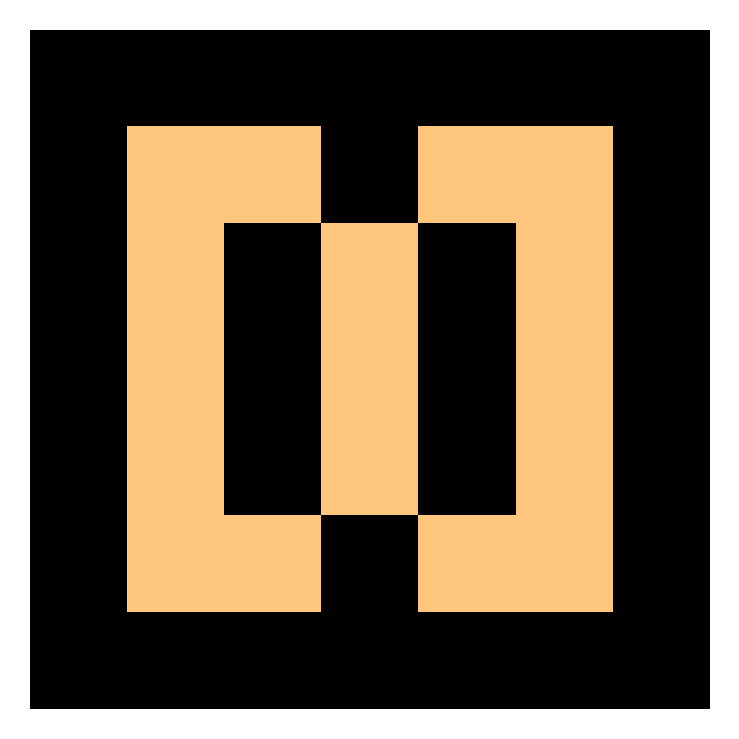

  0%|          | 0/23 [00:00<?, ?it/s]

24 6 24
[[0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 0]
 [0 1 0 1 1 0 1 0]
 [0 1 0 1 1 0 1 0]
 [0 1 0 0 0 0 1 0]
 [0 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0]]


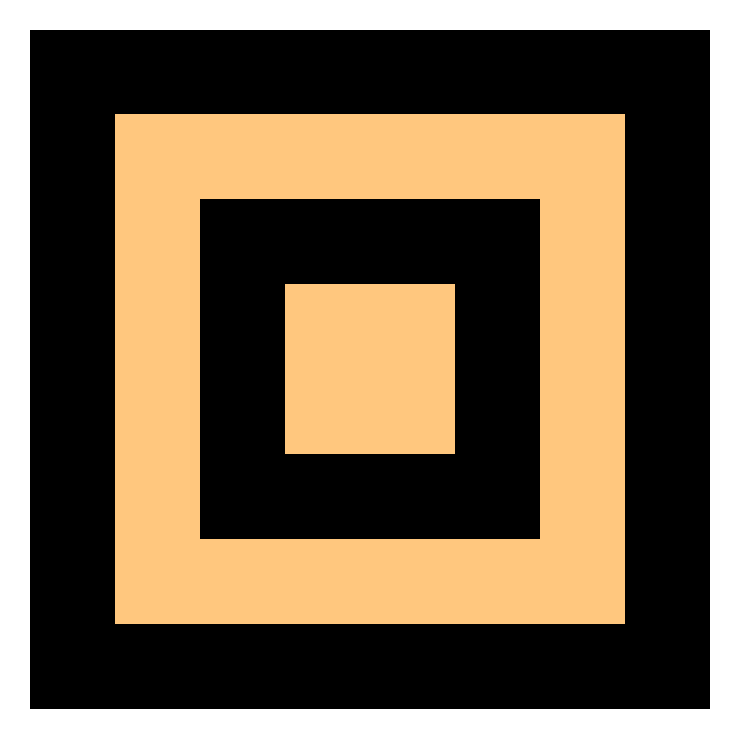

  6%|▋         | 2/31 [00:00<00:05,  5.64it/s]

32 7 30
[[0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 0 1 0]
 [0 1 0 0 0 0 1 0 0]
 [0 1 1 1 1 1 0 1 0]
 [0 0 0 0 0 1 0 1 0]
 [0 1 1 0 1 0 0 1 0]
 [0 1 1 0 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0]]


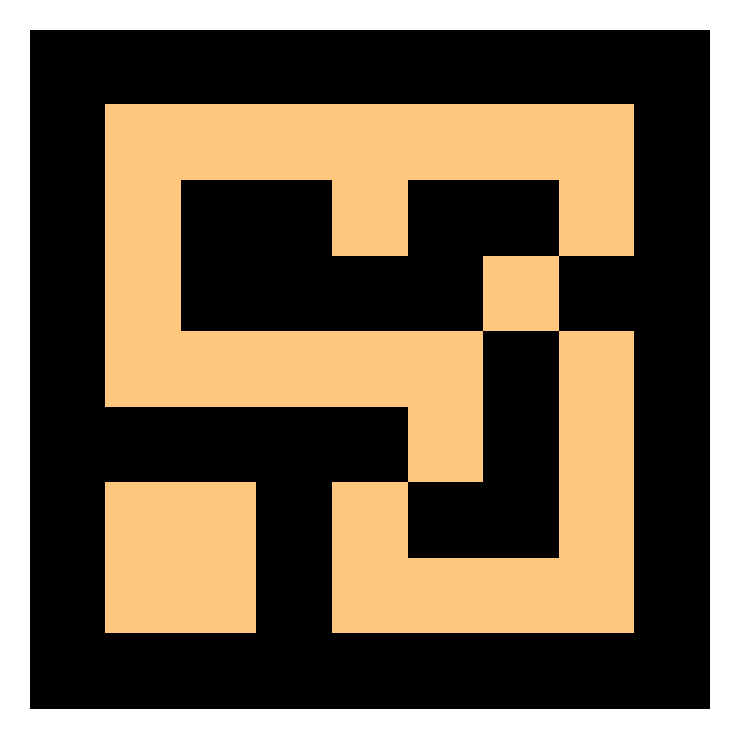

  0%|          | 0/39 [00:00<?, ?it/s]

40 8 40
[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 1 1 1 1 0 1 0]
 [0 1 0 1 0 0 1 0 1 0]
 [0 1 0 1 0 0 1 0 1 0]
 [0 1 0 1 1 1 1 0 1 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]]


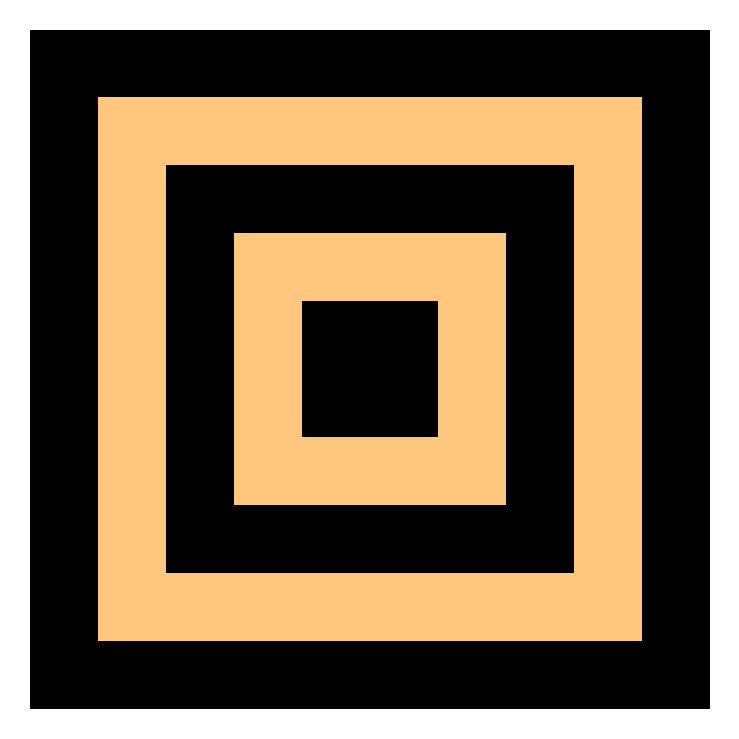

  2%|▏         | 1/49 [00:00<00:42,  1.12it/s]

50 9 49
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 1 0]
 [0 1 0 1 1 0 1 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 1 0 1 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


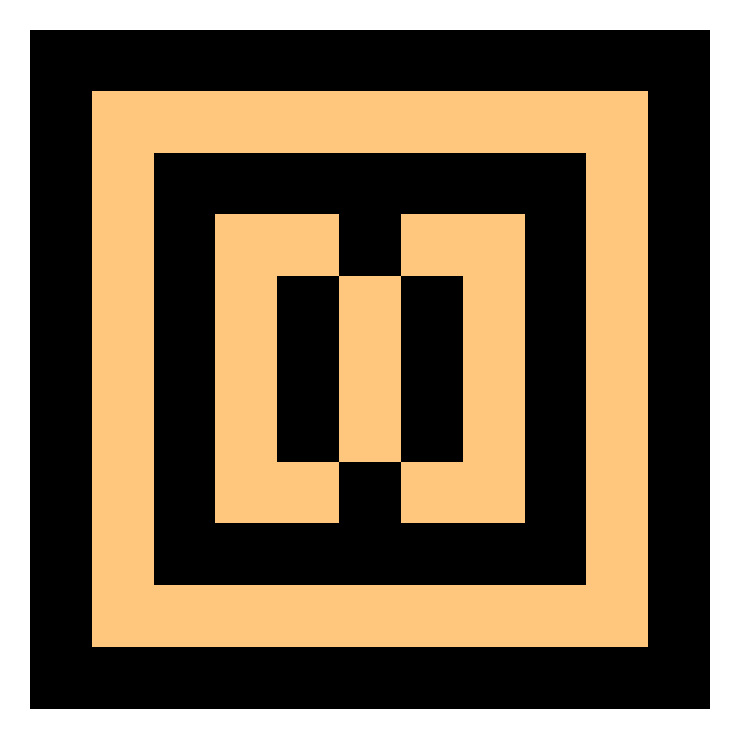

  0%|          | 0/59 [00:00<?, ?it/s]

60 10 60
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 1 1 1 1 1 1 0 1 0]
 [0 1 0 1 0 0 0 0 1 0 1 0]
 [0 1 0 1 0 1 1 0 1 0 1 0]
 [0 1 0 1 0 1 1 0 1 0 1 0]
 [0 1 0 1 0 0 0 0 1 0 1 0]
 [0 1 0 1 1 1 1 1 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


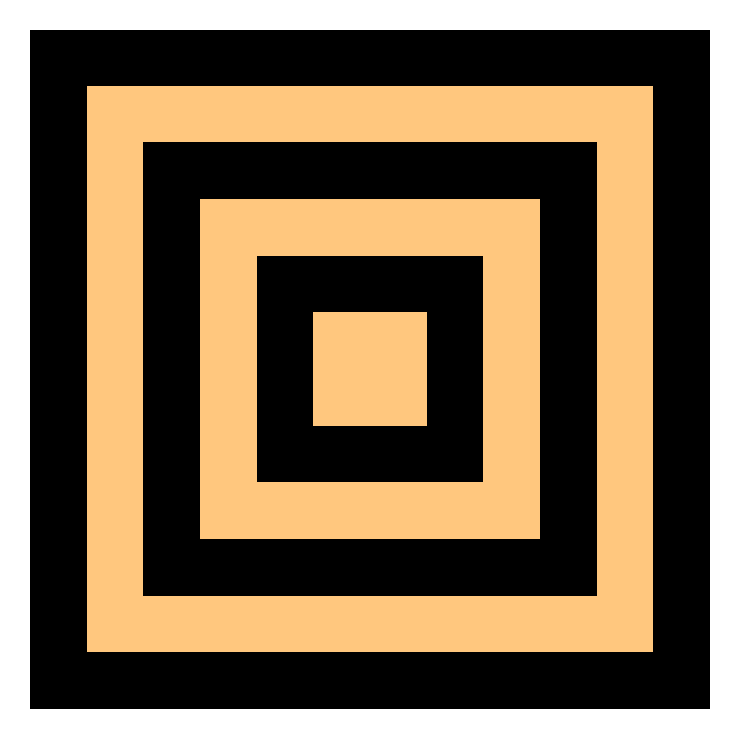

  0%|          | 0/71 [00:01<?, ?it/s]

In [ ]:
import pysat.solvers
from pysat.card import CardEnc as encode
from random import shuffle
import numpy as np
from math import sqrt
from tqdm import tqdm 

def clauses_or(A, B, top):
    x = top + 1 
    y = top + 2

    out = [[x,y],]

    for i in A:
        out.append(i + [-x,])

    for i in B:
        out.append(i + [-y,])

    return out

def clauses_not(A, top):
    x = [top + i for i in range(1, len(A)+1)] 
    out = [[-i for i in x],]

    for k, v in enumerate(A):
        out.append(v + [-x[k],])

    return out, max(x) + 1

for nn in range(4, 30):

    dim = (nn, nn)
    N = dim[0]*dim[1]
    Rr = ((dim[1]-1)**2)//2
    

    
        
    v = []
    t = 0
    d = dict()

    for i in range(dim[0]):
        for j in range(dim[1]):
            t += 1
            d[(i,j)] = t

            v.append((i,j))

    clauses = []
    topid = dim[0]*dim[1]+1

    for a, b in v:
        g  = d[(a,b)]

        temp = [(a+1,b),(a,b+1),  (a-1,b),(a,b-1),   (a-1,b-1),(a+1,b+1), (a-1,b+1),(a+1,b-1)]
        #temp = [ (a+1,b),(a-1,b), (a,b+1),(a,b-1), ]

        if a == dim[0]-1:
            temp = list(filter(lambda x: x not in ((a+1,b),(a+1,b+1),(a+1,b-1)), temp))

        if b == dim[1]-1:
            temp = list(filter(lambda x: x not in ((a,b+1),(a-1,b+1),(a+1,b+1)), temp))

        if a == 0:
            temp = list(filter(lambda x: x not in ((a-1,b),(a-1,b-1),(a-1,b+1)), temp))

        if b == 0:
            temp = list(filter(lambda x: x not in ((a,b-1),(a+1,b-1),(a-1,b-1)), temp))

            
        tempc = []
        c = [d[k] for k in temp]

        if len(c) > 5:
            tclaus = encode.atleast(lits = c, bound = 2, top_id = topid).clauses
            for i in tclaus:
                clauses.append([-g,] +  i)
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)


            tclaus = encode.atmost(lits = c, bound = 3, top_id = topid).clauses
            for i in tclaus:
                clauses.append([-g,] +  i)
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)



        temp1 = []
        temp2 = []

        if len(c) > 3:
            tclaus = encode.equals(lits = c, bound = 3, top_id = topid).clauses
            for i in tclaus:
                temp1.append([ g, ] +  i)
            topid = max(max(abs(literal) for clause in clauses + temp1 for literal in clause), topid)
            temp1, topid = clauses_not(temp1, topid)

            for i in temp1:
                clauses.append(i)

            # tclaus = encode.equals(lits = c, bound = 6, top_id = topid).clauses
            # for i in tclaus:
            #     temp2.append([ g, ] +  i)
            # topid = max(max(abs(literal) for clause in clauses + temp2 + temp1 for literal in clause), topid)
            # temp1, topid = clauses_not(temp1, topid)

            # for i in clauses_or(temp1, temp2, topid):
            #     clauses.append(i)

            

        topid += 3

        if len(c) < 8:
            clauses.append([ -g, ] )
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)

            # tclaus = encode.atmost(lits = c, bound = 2, top_id = topid).clauses
            # for i in tclaus:
            #     clauses.append([ g, ] +  list(i))
            # topid = max(max(abs(literal) for clause in clauses + temp2 for literal in clause), topid)


        #clauses += tempc
            

    for bbound in tqdm(range(Rr, 1, -1)):
        clausesTemp = clauses + encode.equals(lits= [i for i in range(1,dim[0]*dim[1] +1)], top_id = topid, bound = bbound).clauses

        solver = pysat.solvers.Cadical()

        for clause in clausesTemp:
            solver.add_clause(clause)

        sat = solver.solve()

        if sat:
            
            model = solver.get_model()
            temp = [1 if i> 0 else 0 for i in model[:N]]
            
            print(Rr, nn-2, sum(temp))

            temp = np.array(temp)
            temp.resize(dim)

            print(temp)
            
            import matplotlib.pyplot as plt

            # cmap =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
            #                     'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
            #                     'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
            cmap = 'copper'
            # cmap = 'copper'
            size = 3
            plt.figure(num = None, figsize=(size, size), dpi=300)
            plt.axis('off')
            plot = plt.imshow(temp, cmap = cmap)
            plt.show()
            plt.close()
            break

        else:
            pass